# 0 - Imports

In [1]:
import pandas     as pd
import numpy      as np
import seaborn    as sns
import matplotlib.pyplot as plt

from scipy.stats import skew, kurtosis

from PIL import Image

pd.set_option('display.float_format', '{:.3f}'.format)

## 0.1 - Loading data

In [2]:
df_raw = pd.read_csv('kc_house_data.csv')

# 1 - Helper functions

In [3]:
def attributes(num_attributes):
    #Medidas de tendência central
    minimo = num_attributes.apply(np.min)
    maximo = num_attributes.apply(np.max)
    media = num_attributes.apply(np.mean)
    mediana = num_attributes.apply(np.median)

    #Medidas de dispersão
    amplitude = num_attributes.apply(np.max) - num_attributes.apply(np.min)
    desvio_padrao = num_attributes.apply(np.std)
    variancia = num_attributes.apply(np.var)
    cv = (desvio_padrao / media)*100

    #Medidas de distribuição dos dados
    skewness = num_attributes.apply(skew)
    kurt = num_attributes.apply(kurtosis)

    data_attributes = pd.concat([minimo, maximo, media, mediana, amplitude, desvio_padrao, variancia, cv, skewness, kurt], axis=1)

    columns_new = ['min', 'max', 'mean', 'median', 'amplitude', 'std', 'var', 'cv', 'skewness', 'kurtosis']
    data_attributes.columns=columns_new

    return data_attributes

def feature_eng(data):
    df2 = data.copy()

    df2['waterfront_view'] = df2['waterfront'].apply(lambda x: 'not' if x == 0 else 'yes')

    df2['status_condition'] = df2['condition'].apply(lambda x: 'very_bad' if x == 1 else
                                                               'bad'      if x == 2 else 
                                                               'regular'  if x == 3 else
                                                               'good'     if x == 4 else 'excelent')
    
    df2['status_view'] = df2['view'].apply(lambda x: 'very_bad' if x == 0 else
                                                     'bad'      if x == 1 else
                                                     'regular'  if x == 2 else 
                                                     'good'     if x == 3 else 'excelent')
    
    df2['renovated'] = df2['yr_renovated'].apply(lambda x: 'not_renovated' if x == 0 else 'renovated')
    
    df2['property_type'] = df2['bedrooms'].apply(lambda x: 'loft/shed'      if x == 0          else 
                                                           'kitchenette'    if x == 1          else 
                                                           'compact_house'  if x == 2          else
                                                           'standard_house' if x in [3, 4]     else
                                                           'large_house'    if x in [5, 6, 7]  else 'mansion/estate')
    
    df2['year_date']  = df2['date'].apply(lambda x: x.year)
    df2['month_date'] = df2['date'].apply(lambda x: x.month)
    df2['day_date'] = df2['date'].apply(lambda x: x.day)

    df2['Year-Week'] = df2['date'].dt.strftime('%Y-%U')

    df2['day_of_week'] = df2['date'].dt.day_name()

    df2['seasons'] = df2['month_date'].apply(lambda x: 'spring' if x >= 3 and x <= 5 else
                                                       'summer' if x >= 6 and x <= 8 else
                                                       'autumn'   if x >= 9 and x <= 11 else 'winter')
    
    df2['status_basement'] = df2['sqft_basement'].apply(lambda x: 'without_basement' if x == 0 else 'with_basement')

    df2['size_category'] = pd.qcut(df2['sqft_above'], q=4, labels=['size 0', 'size 1', 'size 2', 'size 3'])

    df2['age_property'] = df2['year_date'].max() - df2['yr_built']

    df2['status_age'] = df2['age_property'].apply(lambda x: 'new'        if x <= 10          else 
                                                            'middle-age' if x > 10 and x<=30 else 'old')
    
    df2['no_build_area'] = df2['sqft_lot'] - df2['sqft_above']

    return df2



# 2 - Description data

## 2.1 - Data dimension

In [4]:
df_raw.shape

print(f'Quantidade de colunas: {df_raw.shape[0]}')
print(f'Quantidade de linhas: {df_raw.shape[1]}')

Quantidade de colunas: 21613
Quantidade de linhas: 21


## 2.2 - Columns

In [5]:
df_raw.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

- id: Identificação do imóvel
- data: Data de venda do imóvel
- price: Preço do imóvel
- bedrooms: Quantidade de quartos
- bathrooms: Quantidade de banheiros
- sqft_living: Metragem da área interior do apartamento (sqft_above + sqft_basement)
- sqft_lot: Metragem da área do lote
- floors: Quantidade de andares
- waterfront: Variável que indica a presença ou não de vista para água (0 = não e 1 = sim)
- view: Um índice de 0 a 4 que indica a qualidade da vista da propriedade. Varia de 0 a 4, onde: 0 = baixa 4 = alta
- condition: Condição de conservação do imóvel
- grade: Nota geral dada a unidade habitacional 
- sqft_above: A metragem quadrada do espaço habitacional interior acima do nível do solo
- sqft_basement: A metragem quadrada do porão
- yr_built: Ano de construção do imóvel
- yr_renovated: Ano de reforma do imóvel
- zipcode: Código postal
- lat: Latitude da localização do imóvel
- long: Longitude da localização do imóvel 
- sqft_living15: Medida (em pés quadrado) do espaço interno de habitação para os 15 vizinhos mais próximo
- sqft_lot15: Medida (em pés quadrado) dos lotes de terra dos 15 vizinhos mais próximo

## 2.3 - Data types

In [6]:
df1 = df_raw.copy()

In [7]:
df1.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [8]:
df1['id'] = df1['id'].astype('str')
df1['date'] = pd.to_datetime(df1['date'])
df1['zipcode'] = df1['zipcode'].astype('str')

## 2.4 - Check NA

In [9]:
df1.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## 2.5 - Check duplicates

In [10]:
print(f"Quantidade de dados duplicados: {df1.duplicated().sum()}")

Quantidade de dados duplicados: 0


## 2.6 - Descriptive statistical

In [11]:
#Seleção de atributos numéricos
num_attributes = df1.select_dtypes(include=['int64', 'float64'])

#Seleção de atributos categóricos
cat_attributes = df1.select_dtypes(exclude=['int64', 'float64'])

### 2.6.1 - Numerical attributes

 - Analisando os aspectos estatísticos dos dados numéricos

In [12]:
attributes(num_attributes)

,min,max,mean,median,amplitude,std,var,cv,skewness,kurtosis
price,75000.000,7700000.000,540088.142,450000.000,7625000.000,367118.703,134776142225.573,67.974,4.024,34.577
bedrooms,0.000,33.000,3.371,3.000,33.000,0.930,0.865,27.591,1.974,49.052
bathrooms,0.000,8.000,2.115,2.250,8.000,0.770,0.593,36.418,0.511,1.279
sqft_living,290.000,13540.000,2079.900,1910.000,13250.000,918.420,843494.652,44.157,1.471,5.242
sqft_lot,520.000,1651359.000,15106.968,7618.000,1650839.000,41419.553,1715579393.304,274.175,13.059,285.012
floors,1.000,3.500,1.494,1.500,2.500,0.540,0.292,36.136,0.616,-0.485
waterfront,0.000,1.000,0.008,0.000,1.000,0.087,0.007,1147.149,11.384,127.603
view,0.000,4.000,0.234,0.000,4.000,0.766,0.587,327.054,3.396,10.890
condition,1.000,5.000,3.409,3.000,4.000,0.651,0.423,19.086,1.033,0.525
grade,1.000,13.000,7.657,7.000,12.000,1.175,1.382,15.351,0.771,1.190


### 2.6.2 - Categorial attributes

 - Analisando os dados categóricos em torno do preço de venda

In [13]:
cat_attributes.columns

Index(['id', 'date', 'zipcode'], dtype='object')

I) Evolução do preço ao longo do tempo

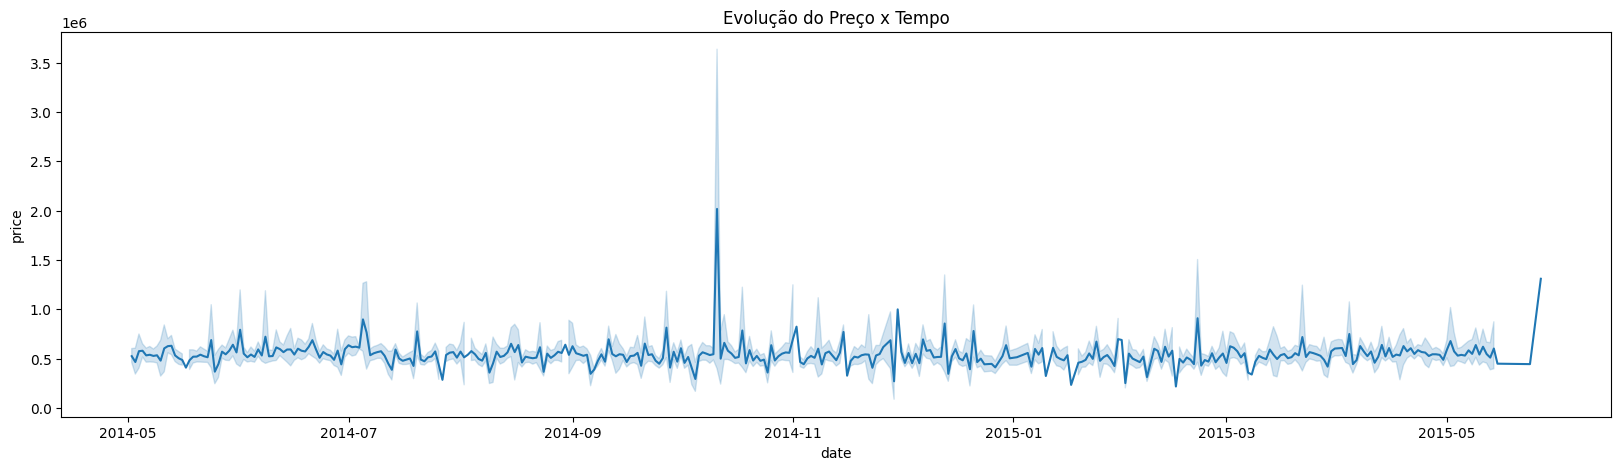

In [14]:
plt.figure(figsize=(20, 5))
sns.lineplot(data=df1, x='date', y='price')
plt.title('Evolução do Preço x Tempo')

plt.show()

II) Distribuição do preço pela: waterfronte, view, conditions

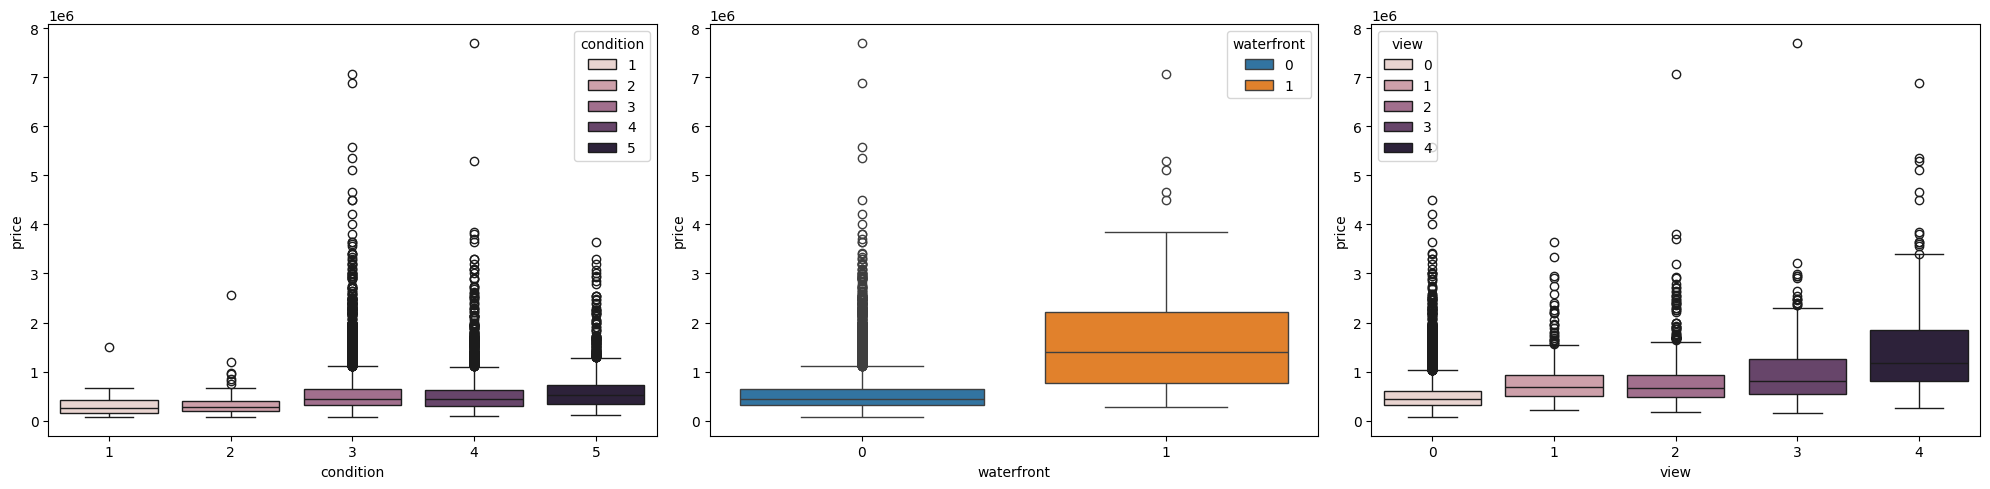

In [15]:
plt.figure(figsize=(20, 5))

# Primeiro gráfico - Condition x Preço
plt.subplot(1, 3, 1)
sns.boxplot(data=df1, x='condition', y='price', hue='condition')

# Segundo gráfico - Waterfront x Preço
plt.subplot(1, 3, 2)
sns.boxplot(data=df1, x='waterfront', y='price', hue='waterfront')

# Terceiro gráfico - View x Preço
plt.subplot(1, 3, 3)
sns.boxplot(data=df1, x='view', y='price', hue='view')

plt.tight_layout()  # Ajusta o espaçamento entre os subplots
plt.show()

# 3 - Feature engineering

In [16]:
df2 = df1.copy()

## 3.1 - Featuring engineering

In [17]:
df2 = feature_eng(df2)

In [18]:
df2.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'waterfront_view',
       'status_condition', 'status_view', 'renovated', 'property_type',
       'year_date', 'month_date', 'day_date', 'Year-Week', 'day_of_week',
       'seasons', 'status_basement', 'size_category', 'age_property',
       'status_age', 'no_build_area'],
      dtype='object')

# 4 - Hypothesis for analysis

## 4.1 - Hypothesis

- H1:  Há relação entre o imóvel ter sido restaurado e ter vista para a água
- H2:  Imóveis com vista para a água possuem condition acima de 2 (good e excelent)
- H3:  A área do imóvel é proporcional ao seu valor
- H4:  Imóveis com áreas sem construção tem um preço maior que aquelas que possuem toda a área ocupada
- H5:  Imóveis considerados novos possuem preços maiores (lembrar e analisar dentro do msm grupo para n haver discrepancias - 3 quartos com 3 quartos e etc)
- H6:  A season com mais vendas é summer e autumn
- H7:  O dia da semana que se observa o aumento das vendas é na sexta-feira
- H8:  Imóveis do tipo casa com porão são mais caros
- H9:  Imóveis localizados mais próximos do centro da cidade têm preços mais altos
- H10: Imóveis com maior número de banheiros têm maior probabilidade de serem classificados como "excelentes" no condition

## 4.2 - Mind map

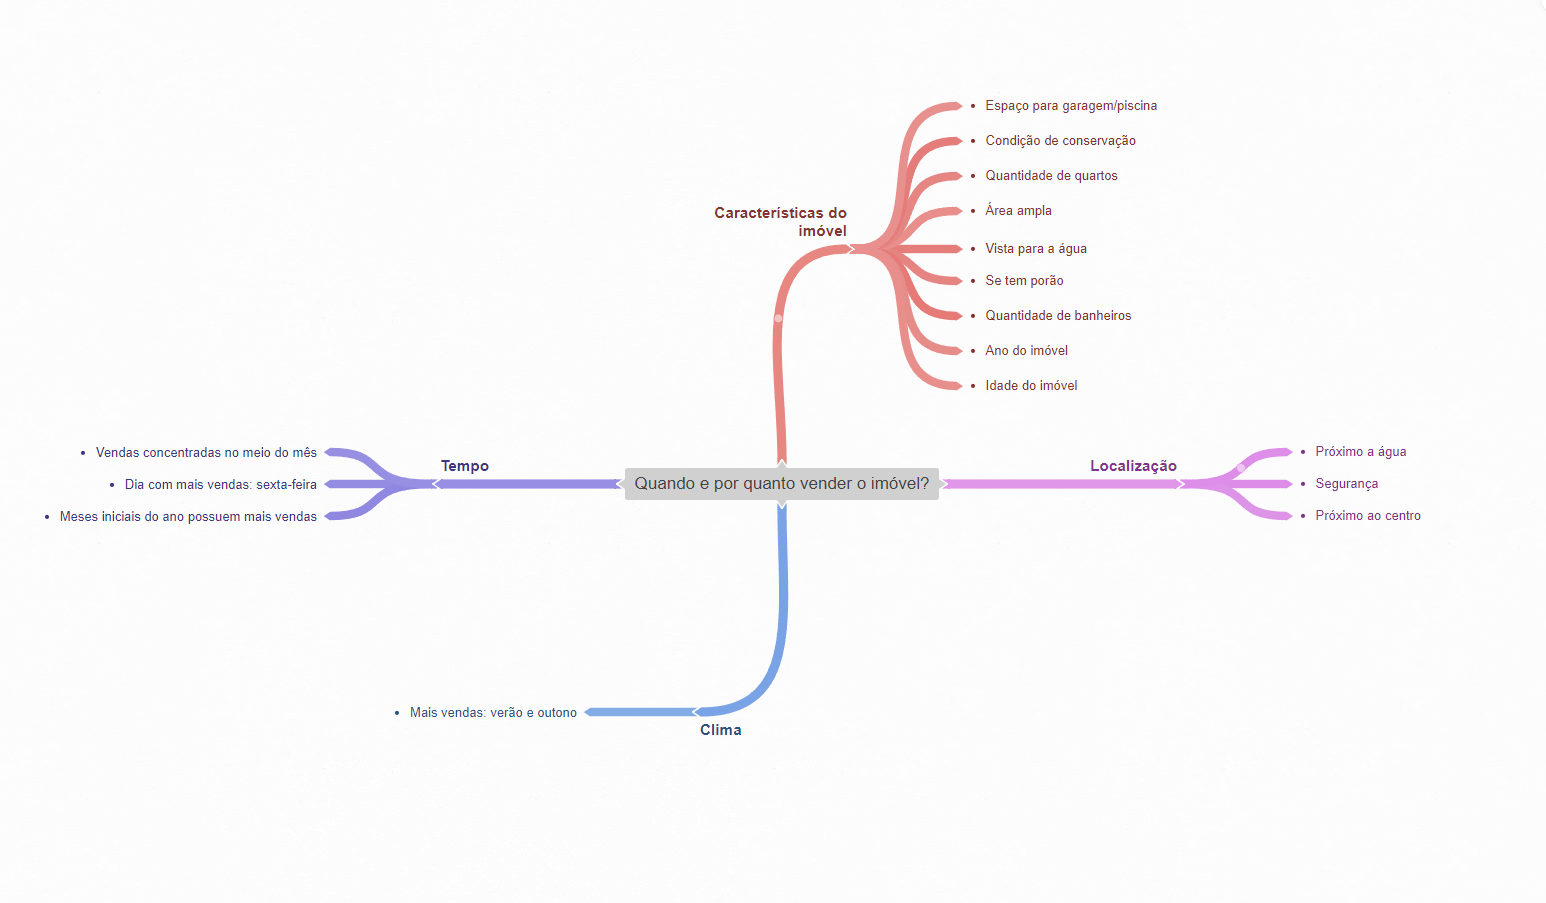

In [19]:
Image.open('img/mind map.png')

# 5 - Exploratory Data Analysis

## 5.1 - Univariate

In [21]:
df3 = df2.copy()

### 5.1.1 - Price

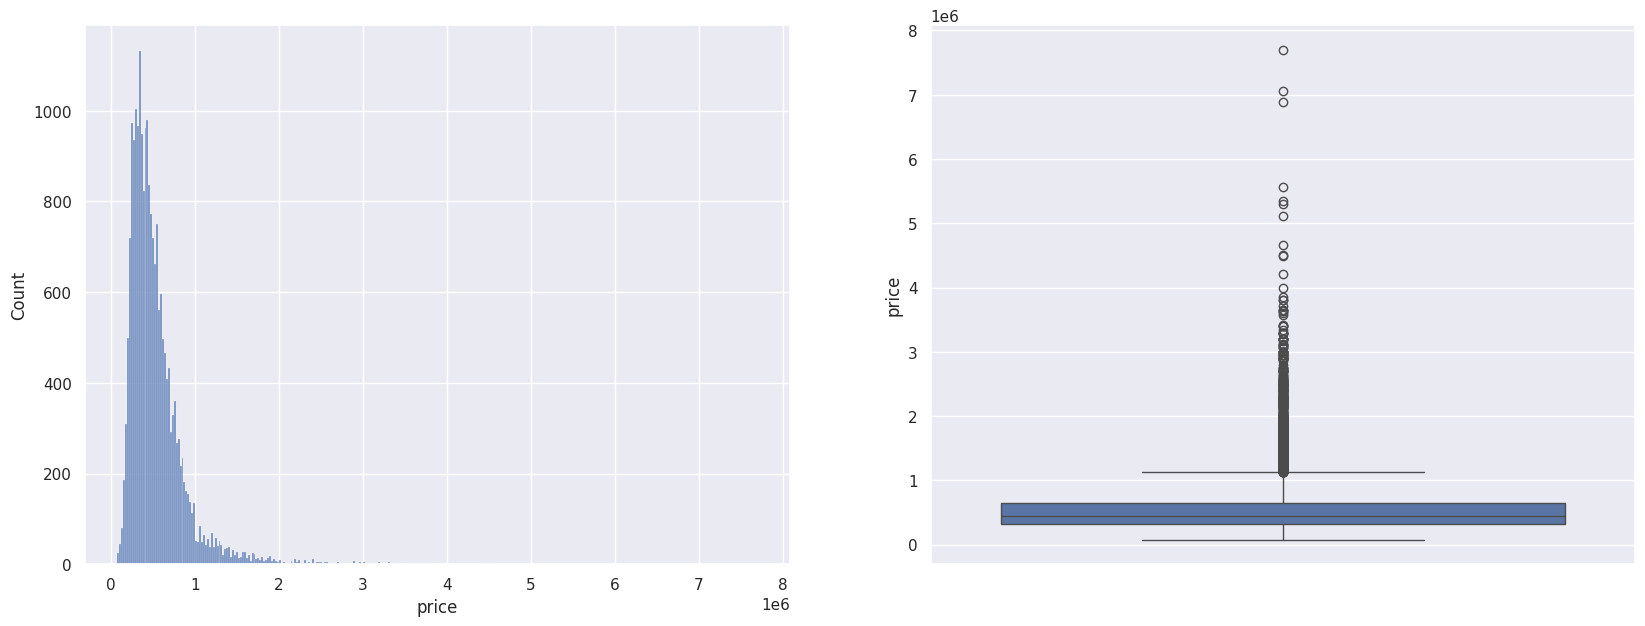

In [47]:
# Plotagem da distribuição dos preços
plt.figure(figsize=(20,7))

plt.subplot(1,2,1)
sns.histplot(df3, x='price')

plt.subplot(1,2,2)
sns.boxplot(df3, y='price')

plt.show()


### 5.1.2 - Numeric variables

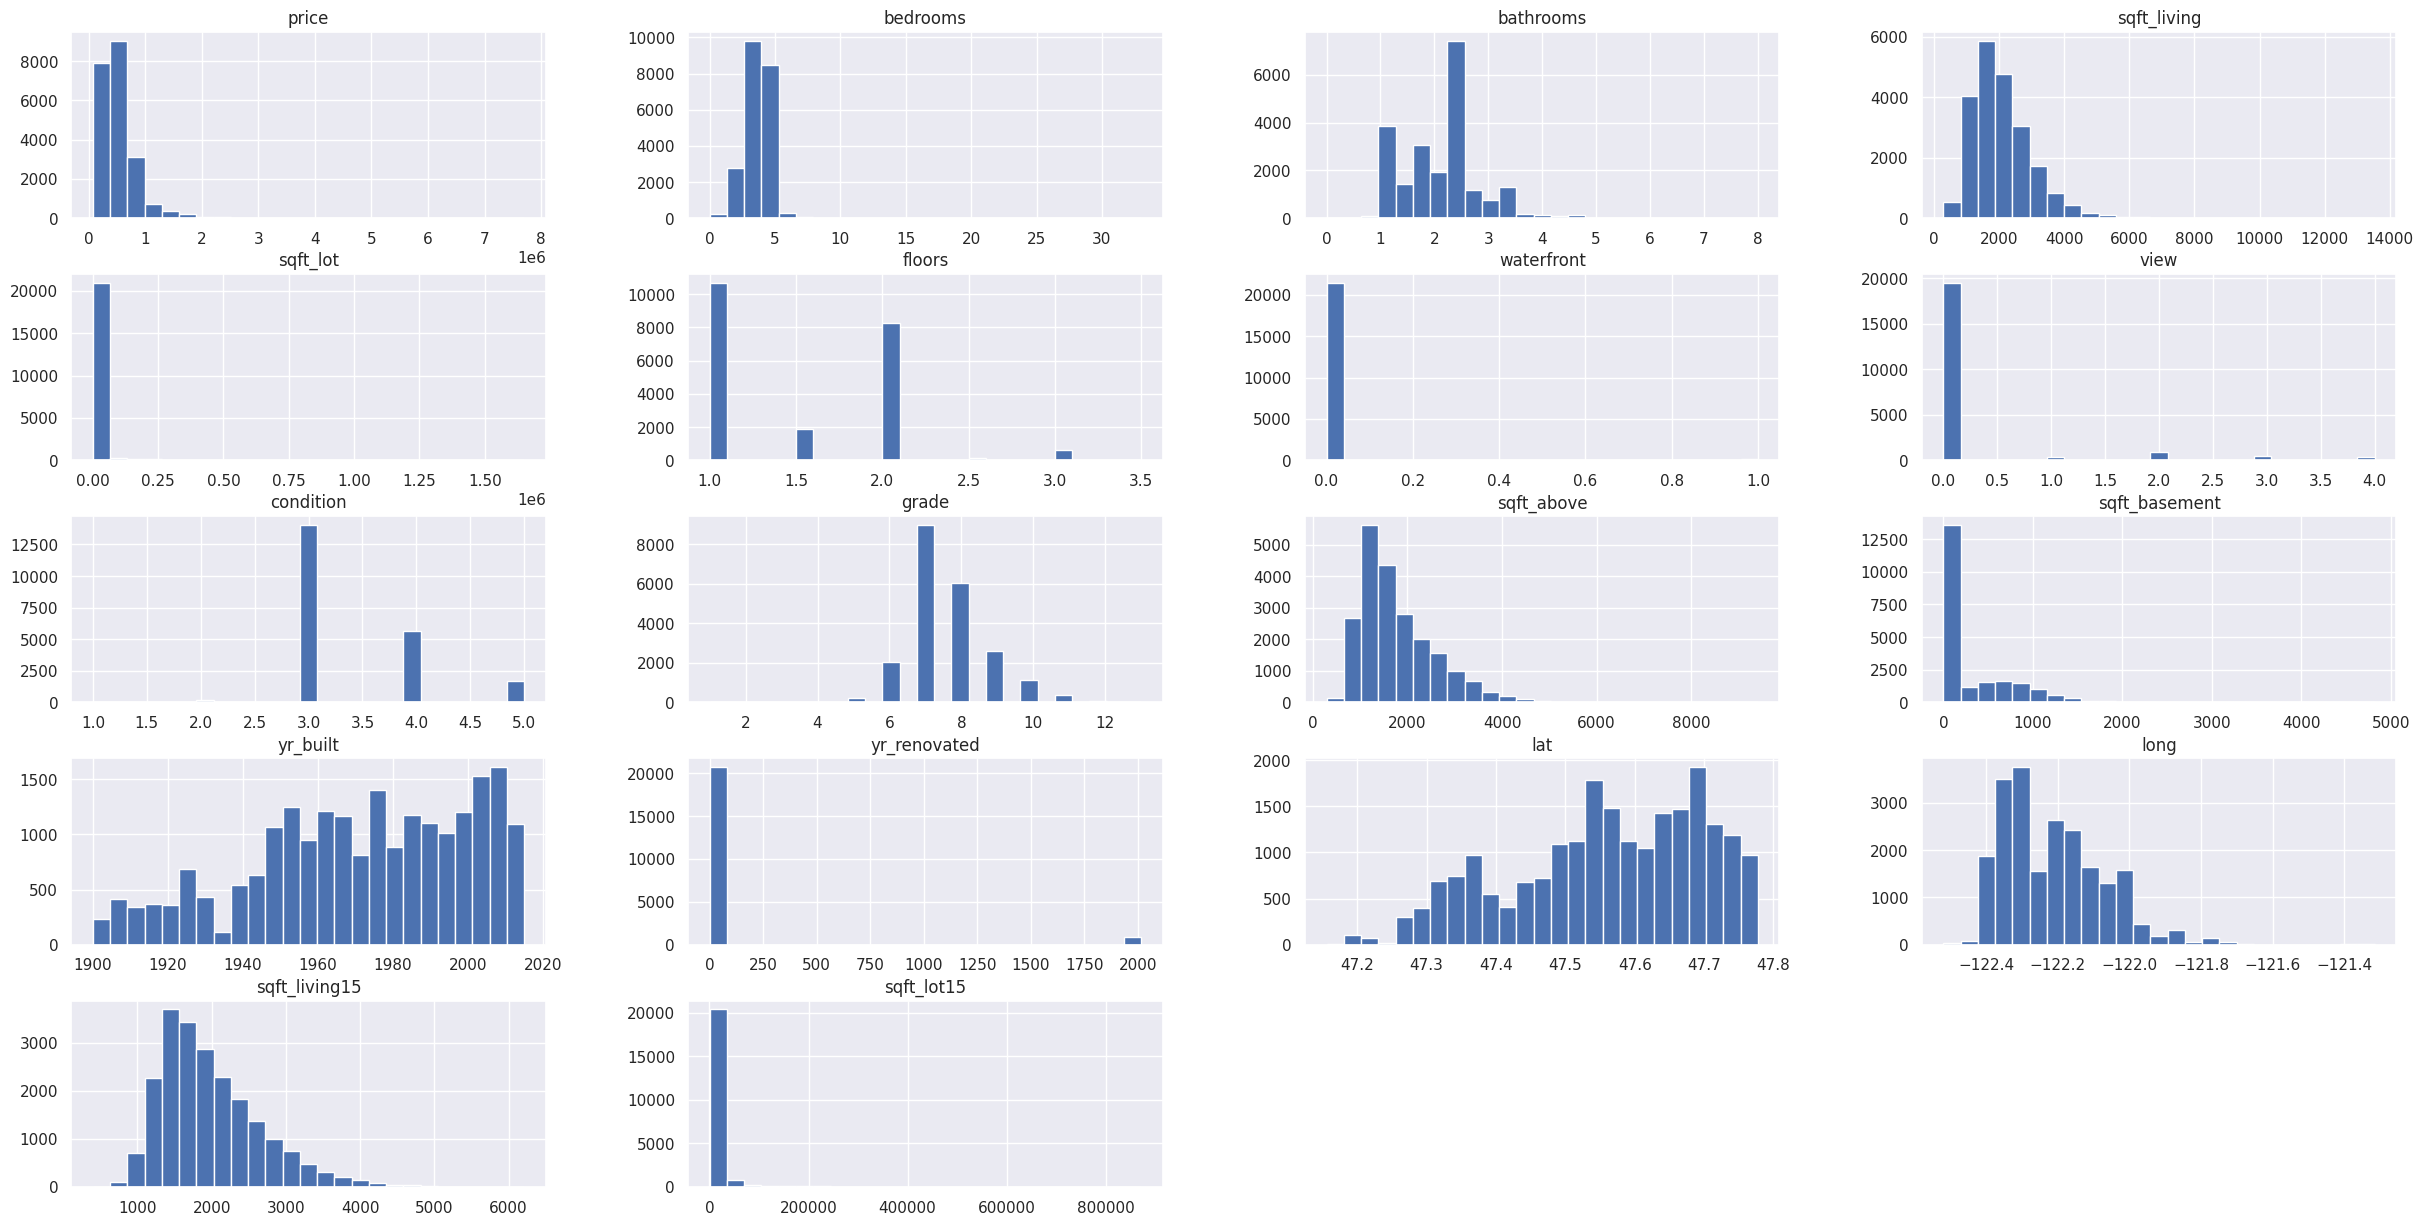

In [33]:
plt.rcParams['figure.figsize'] = [30, 15]
num_attributes.hist(bins=25)

plt.show()

### 5.1.3 - Categorical variables

In [ ]:
df3_cat = df3.select_dtypes(exclude=['int64', 'float64','datetime'])

df3_cat.dtypes

id                    object
zipcode               object
waterfront_view       object
status_condition      object
status_view           object
renovated             object
property_type         object
Year-Week             object
day_of_week           object
seasons               object
status_basement       object
size_category       category
status_age            object
dtype: object

<Axes: xlabel='status_age', ylabel='count'>

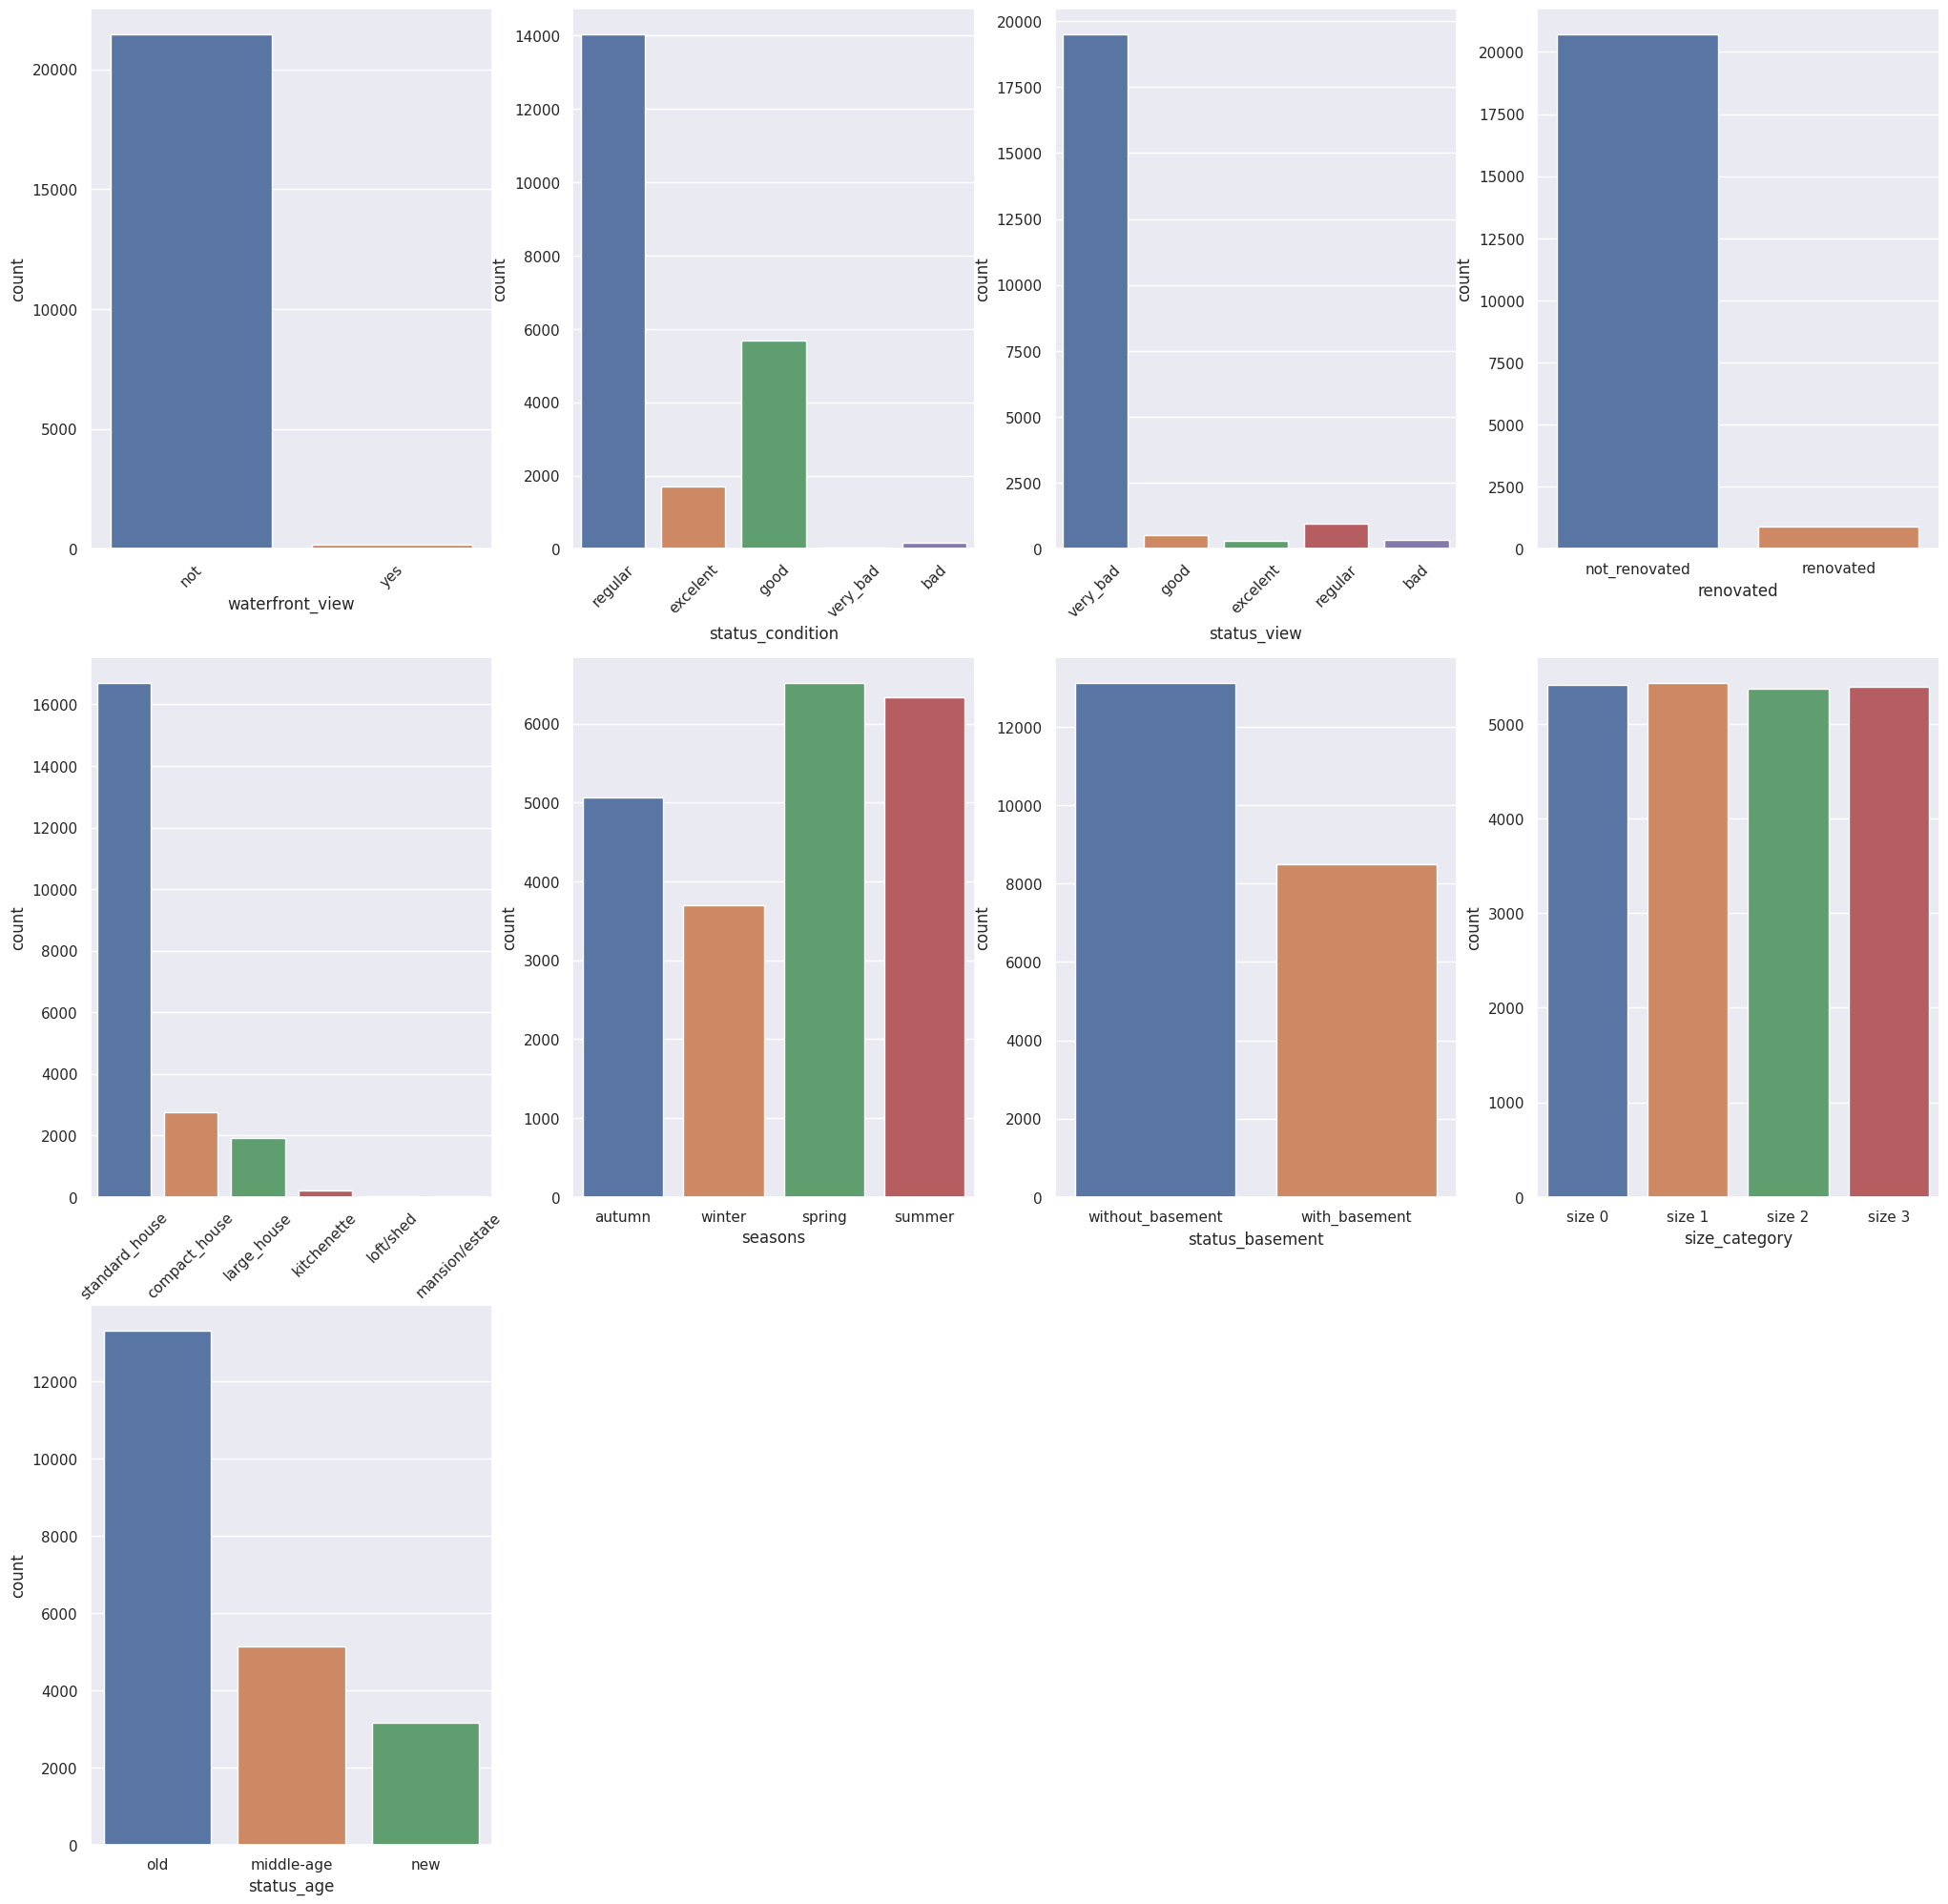

In [93]:
plt.figure(figsize=(25,25))

plt.subplot(3,4,1)
sns.countplot(df3, x='waterfront_view', hue='waterfront_view')
plt.xticks(rotation=45)

plt.subplot(3,4,2)
sns.countplot(df3, x='status_condition', hue='status_condition')
plt.xticks(rotation=45)

plt.subplot(3,4,3)
sns.countplot(df3, x='status_view', hue='status_view')
plt.xticks(rotation=45)

plt.subplot(3,4,4)
sns.countplot(df3, x='renovated', hue='renovated')

plt.subplot(3,4,5)
sns.countplot(df3, x='property_type', hue='property_type')
plt.xticks(rotation=45)

plt.subplot(3,4,6)
sns.countplot(df3, x='seasons', hue='seasons')

plt.subplot(3,4,7)
sns.countplot(df3, x='status_basement', hue='status_basement')

plt.subplot(3,4,8)
sns.countplot(df3, x='size_category', hue='size_category')

plt.subplot(3,4,9)
sns.countplot(df3, x='status_age', hue='status_age')